<a href="https://colab.research.google.com/github/CarlosYohei/ASSIGNMENT18/blob/main/Day07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DAY 07 - DNC
#Carlos Yohei - RID 4313
#Sistema de Recomendação

Tabelas x campos x relacionamento

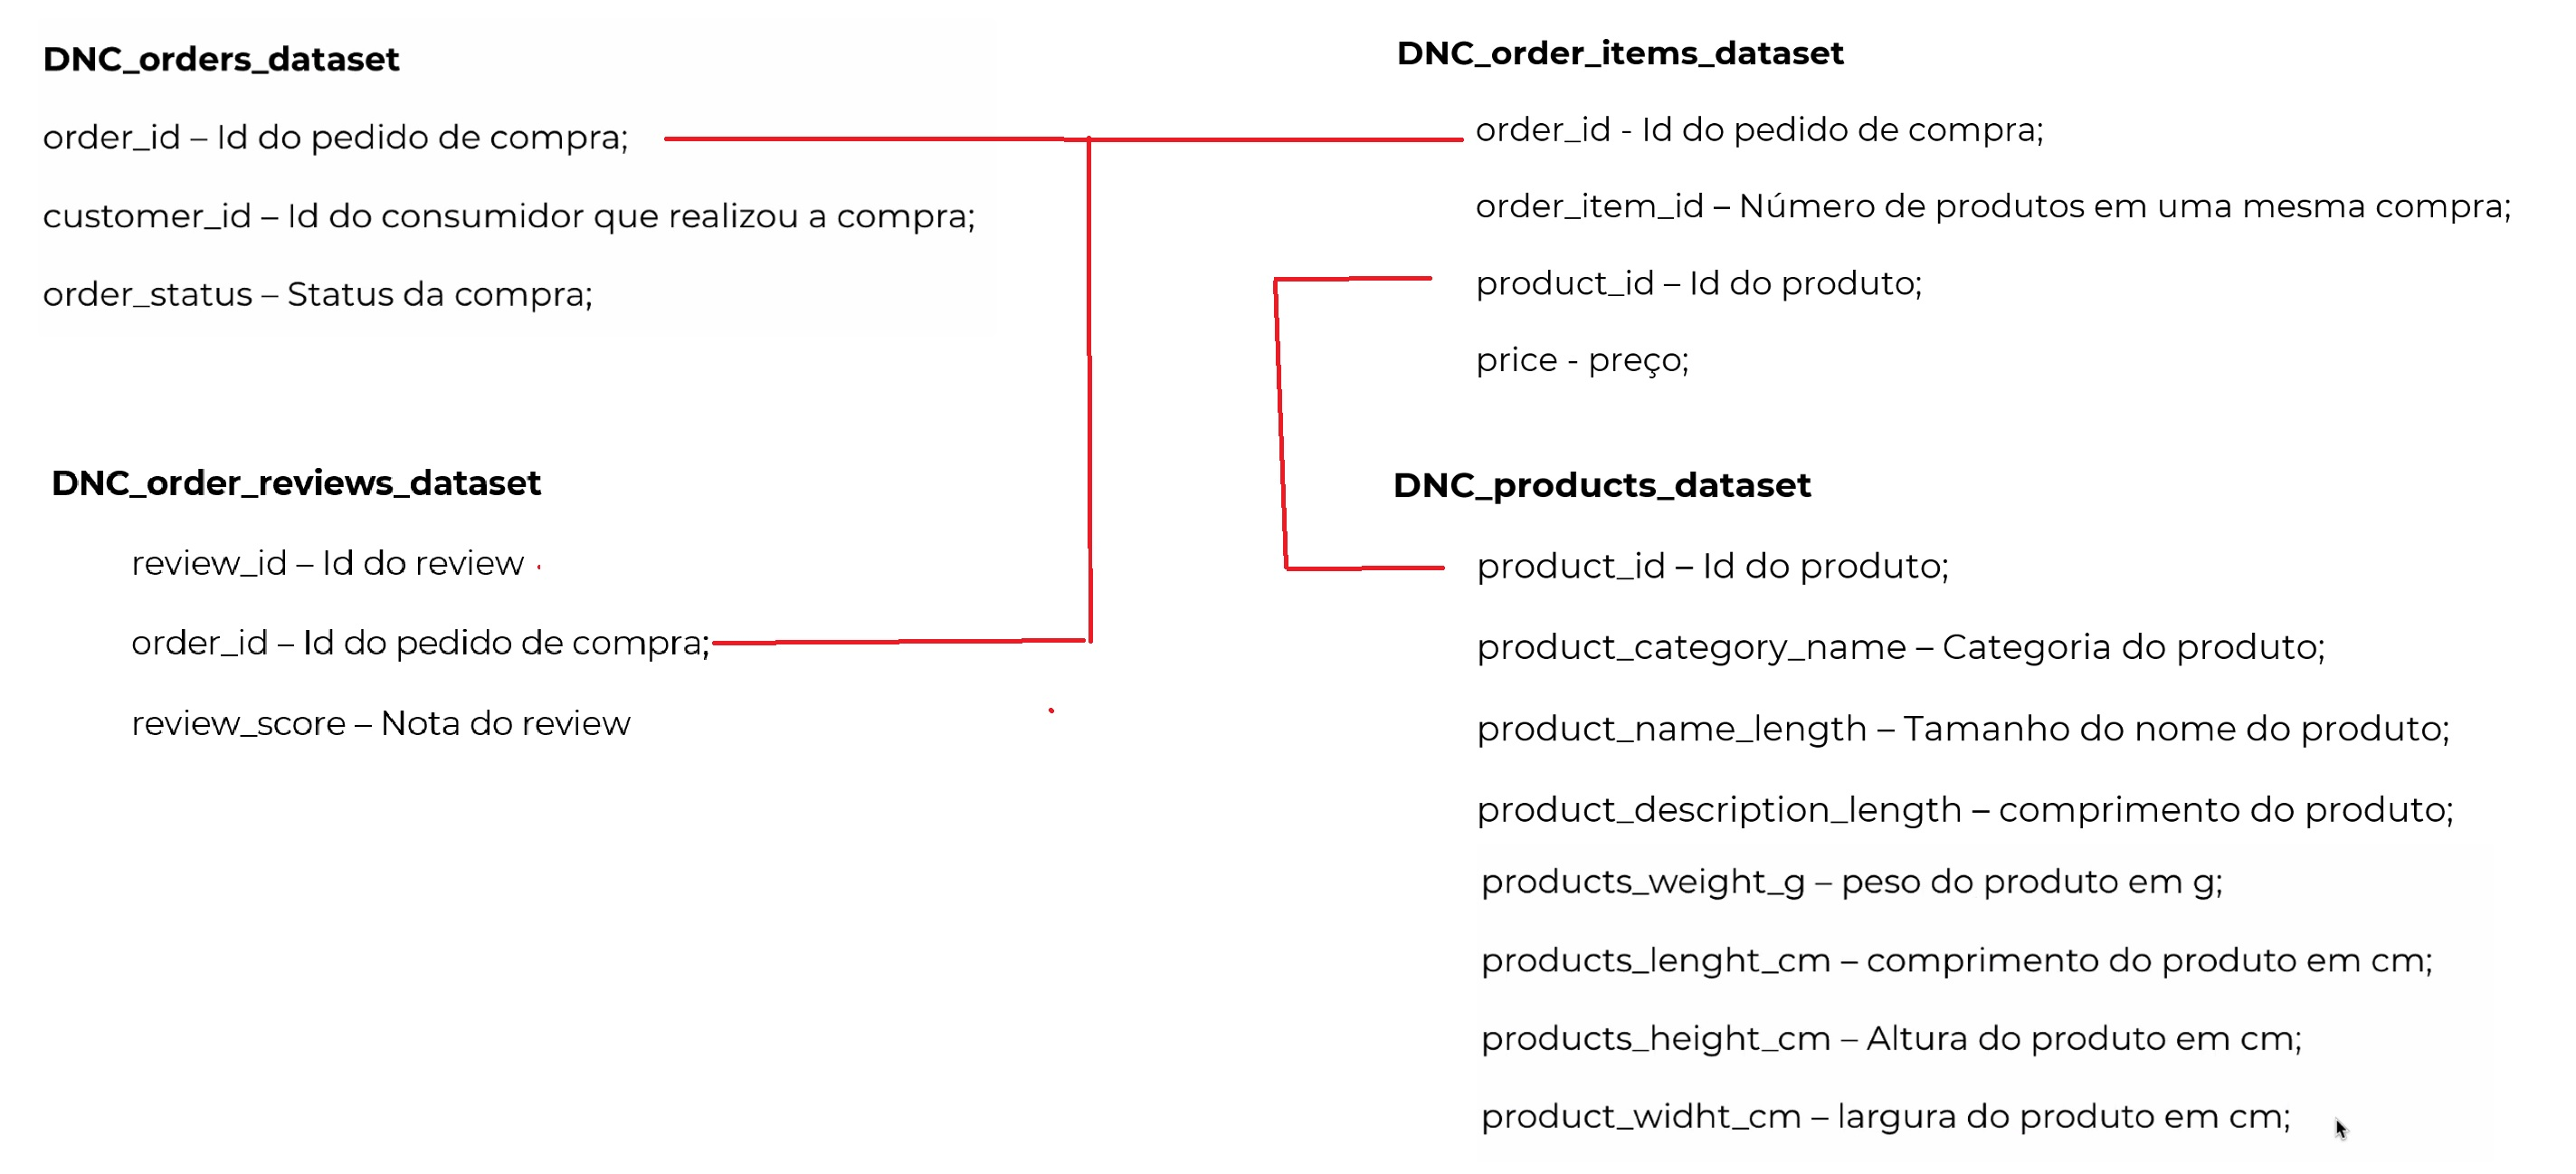

In [1]:
!pip install pandas-profiling==2.8.0

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Importação das tabelas

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

url = 'https://raw.githubusercontent.com/CarlosYohei/Day07/main/Data/DNC_orders_dataset.csv'
df_orders = pd.read_csv(url, index_col=0)
print("DNC_orders_dataset \n")
print("\n", df_orders.head(5))
print("\n", df_orders.info())
print("\n", df_orders.describe())
print(f"\n Registros duplicados", df_orders.duplicated().sum())

url = 'https://raw.githubusercontent.com/CarlosYohei/Day07/main/Data/DNC_order_items_dataset.csv'
df_items = pd.read_csv(url, index_col=0)
print("\n \n DNC_order_items_dataset \n")
print("\n", df_items.head(5))
print("\n", df_items.info())
print("\n", df_items.describe())
print(f"\n Registros duplicados", df_items.duplicated().sum())

url = 'https://raw.githubusercontent.com/CarlosYohei/Day07/main/Data/DNC_order_reviews_dataset.csv'
df_reviews = pd.read_csv(url, index_col=0)
print("\n \n DNC_order_reviews_dataset \n")
print("\n", df_reviews.head(5))
print("\n", df_reviews.info())
print("\n", df_reviews.describe())
print(f"\n Registros duplicados", df_reviews.duplicated().sum())

url = 'https://raw.githubusercontent.com/CarlosYohei/Day07/main/Data/DNC_products_dataset.csv'
df_products = pd.read_csv(url, index_col=0)
print("\n \n DNC_products_dataset \n")
print("\n", df_products.head(5))
print("\n", df_products.info())
print("\n", df_products.describe())
print(f"\n Registros duplicados", df_products.duplicated().sum())


DNC_orders_dataset 


                            order_id                       customer_id order_status
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82    delivered
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c    delivered
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99441 non-null  object
 1   customer_id   99441 non-null  object
 2   order_status  99441 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB

 None

                                 order_id                       customer_id order_status
count                   

Para o Orders, vamos buscar mais detalhes

In [4]:
df_orders.profile_report()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Tratativa dos dados

Enriquecer tabela de itens com nome da categoria

In [5]:
df_items_category = pd.merge(df_items, df_products[['product_id', 'product_category_name']], on='product_id')
df_items_category.head(10)

,order_id,order_item_id,product_id,price,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
5,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
8,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff
9,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


Adicionando rating aos produtos

In [6]:
df_items_category_rating = pd.merge(df_items_category, df_reviews[['order_id', 'review_score']], on='order_id')
df_items_category_rating.head(10)

,order_id,order_item_id,product_id,price,product_category_name,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,5
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,5
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,4
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,5
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,5
5,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,5
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,5
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,5
8,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,58.9,cool_stuff,5
9,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,1


Adicionando todo o resto a orders_dataset

In [7]:
df_orders_full = pd.merge(df_orders, df_items_category_rating, on='order_id')
df_orders_full.head(10)

,order_id,customer_id,order_status,order_item_id,product_id,price,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,1,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,1,595fac2a385ac33a80bd5114aec74eb8,118.70,perfumaria,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,1,aa4383b373c6aca5d8797843e5594415,159.90,automotivo,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,pet_shop,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,papelaria,5
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,1,060cb19345d90064d1015407193c233d,147.90,automotivo,4
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,1,a1804276d9941ac0733cfd409f5206eb,49.90,NaN,2
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,1,4520766ec412348b8d4caa5e8a18c464,59.99,automotivo,5
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,1,ac1789e492dcd698c5c10b97a671243a,19.90,moveis_decoracao,1
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,1,9a78fb9862b10749a117f7fc3c31f051,149.99,moveis_escritorio,5


In [8]:
#df_products.profile_report()

## Elimina nulos e duplicados

In [9]:
print(f"Duplicados antes da limpeza",df_orders_full.duplicated().sum())
df_orders_full.drop_duplicates(inplace=True)
print(f"Duplicados após a limpeza",df_orders_full.duplicated().sum())

Duplicados antes da limpeza 399
Duplicados após a limpeza 0


In [10]:
print(f"Null antes da limpeza",df_orders_full.isna().sum())
df_orders_full.dropna(inplace=True)
print(f"\n Null depois da limpeza",df_orders_full.isna().sum())

Null antes da limpeza order_id                    0
customer_id                 0
order_status                0
order_item_id               0
product_id                  0
price                       0
product_category_name    1593
review_score                0
dtype: int64

 Null depois da limpeza order_id                 0
customer_id              0
order_status             0
order_item_id            0
product_id               0
price                    0
product_category_name    0
review_score             0
dtype: int64


## Gerando os TOP 10 mais bem avaliados/comprados

Estes produtos serão mostrados em campanhas onde não conseguimos ainda saber das preferências do cliente, como em campanhas postadas em páginas, google ou primeiro acesso ao site.

In [34]:
df_top10_avaliados = df_items_category_rating[df_items_category_rating['review_score'] != 0].drop(['order_id','order_item_id','price'], axis=1) 
top10_avaliados_media = df_top10_avaliados.groupby('product_id').mean('review_score')
top10_avalidados = top10_avaliados_media.sort_values('review_score', ascending=False)
top10_avalidados.head(10)

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
60314cbf527af04ebc935be7c02dc1cd,5.0
5fe23e6307c231e287f13c0a4be06c88,5.0
5fe490e61e7a37f2f0d1ad1771ac027d,5.0
c696cd2db7870be08c37822f7c0ef831,5.0
5fef486f2057e10fd91e167348812b7a,5.0
5ff4076c0f01eeba4f728c9e3fa2653c,5.0
5ff59c5f2db7600fa8143442c8b1e4f6,5.0
c68b419d9c6038271b85bac98adb0fc9,5.0


In [45]:
df_top10_comprados = df_items_category_rating.drop(['order_id','order_item_id','price'], axis=1) 
top10_comprados_total = df_top10_comprados.groupby('product_id') \
  .agg({"review_score":"sum"}) \
  .rename(columns={'review_score' : 'qtde_vendidos'})
top10_comprados = top10_comprados_total.sort_values('qtde_vendidos', ascending=False)
top10_comprados.head(10)


,qtde_vendidos
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,2106
422879e10f46682990de24d770e7f83d,1918
99a4788cb24856965c36a24e339b6058,1879
389d119b48cf3043d311335e499d9c6b,1610
368c6c730842d78016ad823897a372db,1522
53759a2ecddad2bb87a079a1f1519f73,1443
d1c427060a0f73f6b889a5c7c61f2ac4,1426
53b36df67ebb7c41585e8d54d6772e08,1341
154e7e31ebfa092203795c972e5804a6,1260
